In [1]:
import pandas as pd
import numpy as np
from plot_accuracy import plot_stepwise_accuracy
from load_data import load_labeled_data

In [2]:
Multi_df = load_labeled_data(data_dir = './Data', label_list=['BRCA_LUMA','BRCA_LUMB', 'BRCA_HER2'], patient_type = './BRCApatient_type.csv')
Double_df = load_labeled_data(data_dir = './Data', label_list=['LUAD', 'LUSC'], patient_type = './BRCApatient_type.csv')

load file : BRCA.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt
load file : BRCA.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt
load file : BRCA.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt
load file : LUAD.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt
load file : LUSC.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt


In [3]:
# cancer data labeling
# Multi_df = pd.get_dummies(Multi_df, columns=['Target'], drop_first=True)
# Double_df = pd.get_dummies(Double_df, columns=['Target'], drop_first=True)

In [4]:
Multi_df['Target'] = Multi_df['Target'].map({'BRCA_LUMA':0, 'BRCA_LUMB':1, 'BRCA_HER2':2})
Multi_df

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,Target
TCGA-3C-AAAU-01A-11R-A41B-07,0.0,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,0.0000,0.0,...,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0,0
TCGA-3C-AALK-01A-11R-A41B-07,0.0,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,0.0000,0.0,...,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0,0
TCGA-4H-AAAK-01A-12R-A41B-07,0.0,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,0.0000,0.0,...,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0,0
TCGA-5L-AAT0-01A-12R-A41B-07,0.0,3.9889,13.6090,114.2572,807.7431,0.0,276.2868,0.0000,0.0000,0.0,...,643.4961,1115.7061,15.8381,626.4848,4131.9842,922.1293,1061.7393,85.0565,0.0,0
TCGA-5L-AAT1-01A-12R-A41B-07,0.0,0.0000,10.5949,115.9984,1108.3945,0.0,208.6390,0.0000,0.0000,0.0,...,568.0522,988.5901,53.7897,513.4474,4418.0929,1411.5729,568.8672,57.8647,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-JL-A3YW-01A-12R-A239-07,0.0,8.8401,14.2147,198.5050,1340.0576,0.0,248.5591,0.3602,0.0000,0.0,...,341.1383,708.5735,84.6542,469.0202,11002.5216,850.5043,508.6455,36.7435,0.0,2
TCGA-LL-A5YO-01A-21R-A28M-07,0.0,1.2667,3.6899,278.5626,1643.3980,0.0,165.7717,0.0000,0.0000,0.0,...,350.8192,894.9470,174.0328,736.3348,6722.2911,1176.9241,606.3610,207.0770,0.0,2
TCGA-OL-A5RZ-01A-11R-A28M-07,0.0,8.9719,27.8568,201.2174,1373.9130,0.0,812.7877,1.5345,0.0000,0.0,...,272.6343,1319.1816,135.0384,340.6650,3830.1790,816.8798,453.1969,10.7417,0.0,2
TCGA-OL-A66P-01A-11R-A31O-07,0.0,0.7194,1.4388,90.1151,1276.2590,0.0,165.4676,0.7194,0.7194,0.0,...,171.2230,702.1583,115.8273,418.7050,5566.1871,873.3813,380.5755,28.0576,0.0,2


In [5]:
ranking_df = pd.read_csv('ranking_df.csv',index_col=0)
ranking_df.columns = ['RF','EXT']
ranking_df

,RF,EXT
?|100130426,2087,5128
?|100133144,2087,1946
?|100134869,2087,5128
?|10357,579,769
?|10431,2087,5128
...,...,...
ZYX|7791,2087,5128
ZZEF1|23140,2087,5128
ZZZ3|26009,2087,5128
psiTPTE22|387590,2087,4021


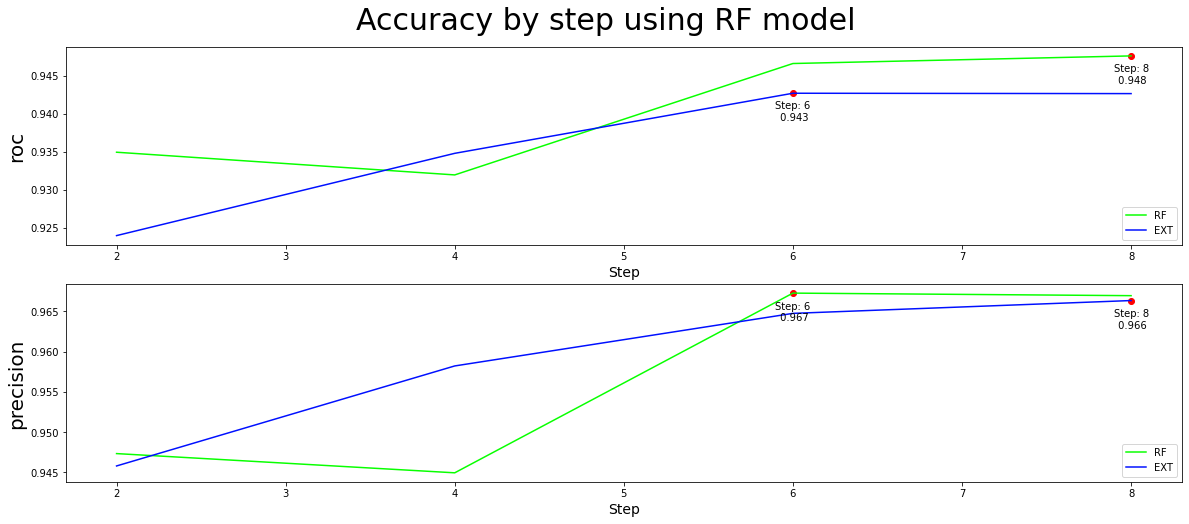

In [5]:
# double class 옵션 ['f1', 'accuracy', 'precision', 'recall', 'roc', 'aic', 'bic']
step_num = list(np.arange(2,10,2))
score_df = plot_stepwise_accuracy(Double_df, ranking_df[['RF','EXT']], step_num, model = ['RF', "recommended"], accuracy_metric=['roc', 'precision'])

In [6]:
score_df

,RF_roc,RF_precision,EXT_roc,EXT_precision
2,0.934929,0.947320,0.923977,0.945782
4,0.931949,0.944929,0.934784,0.958220
6,0.946582,0.967278,0.942677,0.964758
8,0.947581,0.966961,0.942629,0.966353


In [6]:
# multi class 옵션 ['f1', 'accuracy', 'precision', 'recall']
step_num = list(np.arange(2,10,2))
score_df = plot_stepwise_accuracy(Multi_df, ranking_df[['RF','EXT']], step_num, model = ['RF', "recommended"], accuracy_metric=['recall'], multi_class=True)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
score_df